# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:

# Save the HTML from the browser
html = browser.html
# Create a Beautiful Soup object
soup = BeautifulSoup(html, 'html.parser')

In [5]:
# Extract all rows of data
rows_of_data = soup.select("table.table > tbody > tr.data-row")  # skips header row
print(len(rows_of_data))

1867


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [7]:
# Create an empty list
mars_table_data = []

# Loop through the scraped data to create a list of rows
for row_element in rows_of_data:
    row_data = []
    for td in row_element.select("td"):
        row_data.append(td.text)
    mars_table_data.append(row_data)

In [8]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(mars_table_data, columns=["id", "terrestrial_date", "sol", "ls", "month", "min_temp", "pressure"])


In [9]:
# Confirm DataFrame was created successfully
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [10]:
# Examine data type of each column
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [11]:
# Change data types for data analysis
df = df.astype({"id": int,
                "terrestrial_date": "datetime64[ns]",
                "sol": int,
                "ls": int,
                "month": int,
                "min_temp": float,
                "pressure": float})

In [12]:
# Confirm type changes were successful by examining data types again
# Confirm type changes were successful by examining data types again
df.dtypes

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [16]:
# 1. How many months are there on Mars? 
month_counts = df["month"].nunique()
print(month_counts)

12


There are 12 months on Mars.

In [17]:
# 2. How many sols (Martian days) worth of data are there?
len(df["sol"].unique())

1867

There are 1867 sols (Martian days) worth of data.

In [18]:
# 3. What is the average minimum temperature by month?
average_min_temp_by_month = df.groupby("month").agg({"min_temp": "mean"})
average_min_temp_by_month

,min_temp
month,
1,-77.160920
2,-79.932584
3,-83.307292
4,-82.747423
5,-79.308725
6,-75.299320
7,-72.281690
8,-68.382979
9,-69.171642


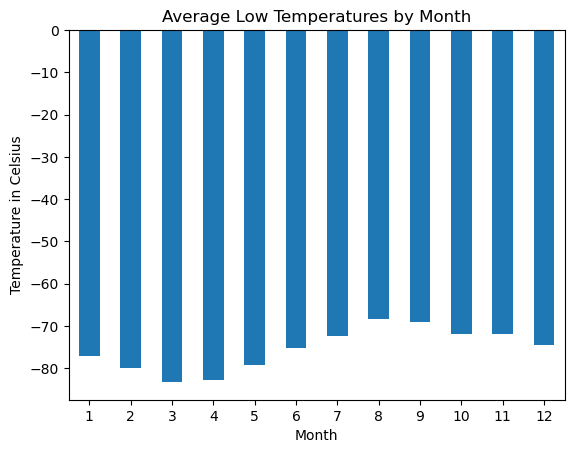

In [19]:
# Plot the average minimum temperature by month
average_min_temp_by_month.plot.bar(title="Average Low Temperatures by Month",
                                   xlabel="Month", ylabel="Temperature in Celsius",
                                   legend=False, rot=0)
plt.show()

In [32]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
avg_min_temp_by_month_sorted = average_min_temp_by_month.sort_values("min_temp")
avg_min_temp_by_month_sorted

,min_temp
month,
3,-83.307292
4,-82.747423
2,-79.932584
5,-79.308725
1,-77.160920
6,-75.299320
12,-74.451807
7,-72.281690
11,-71.985507


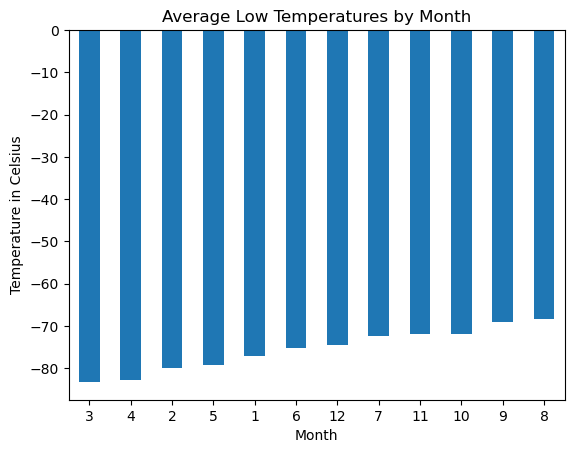

In [24]:
# Plot the average minimum temperature by month in descending order.
avg_min_temp_by_month_sorted.plot.bar(title="Average Low Temperatures by Month",
                                   xlabel="Month", ylabel="Temperature in Celsius",
                                   legend=False, rot=0)
plt.show()

In [25]:
# 4. What is the average pressure by month?
avg_pressure_by_month = df.groupby("month").agg({"pressure": "mean"})
avg_pressure_by_month

,pressure
month,
1,862.488506
2,889.455056
3,877.322917
4,806.329897
5,748.557047
6,745.054422
7,795.105634
8,873.829787
9,913.305970


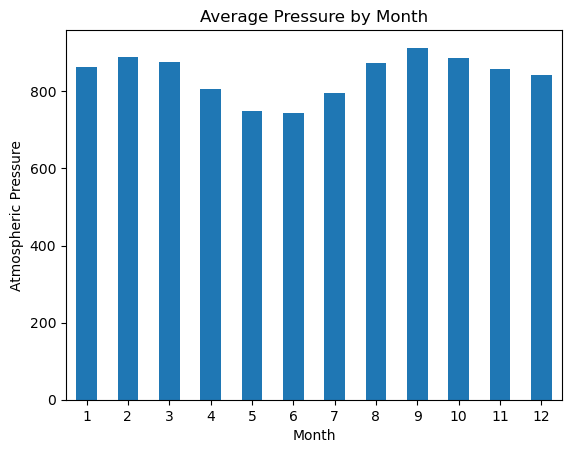

In [26]:
# Plot the average pressure by month
avg_pressure_by_month.plot.bar(title="Average Pressure by Month",
                                   xlabel="Month", ylabel="Atmospheric Pressure",
                                   legend=False, rot=0)
plt.show()

In [29]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
avg_pressure_by_month_sorted = avg_pressure_by_month.sort_values("pressure")

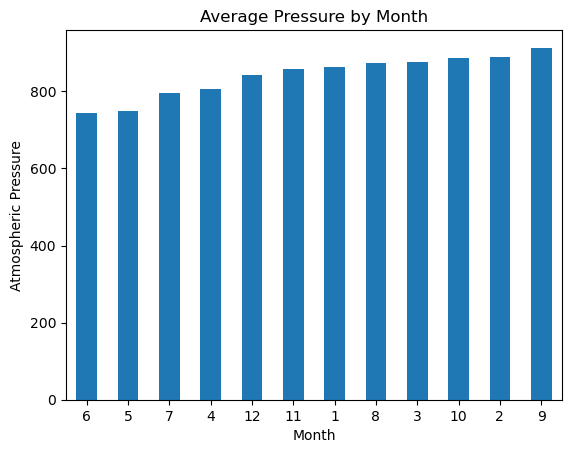

In [28]:
# Plot the average pressure sorted in ascending pressure order.
avg_pressure_by_month_sorted = avg_pressure_by_month.sort_values("pressure")
avg_pressure_by_month_sorted.plot.bar(title="Average Pressure by Month",
                                   xlabel="Month", ylabel="Atmospheric Pressure",
                                   legend=False, rot=0)
plt.show()

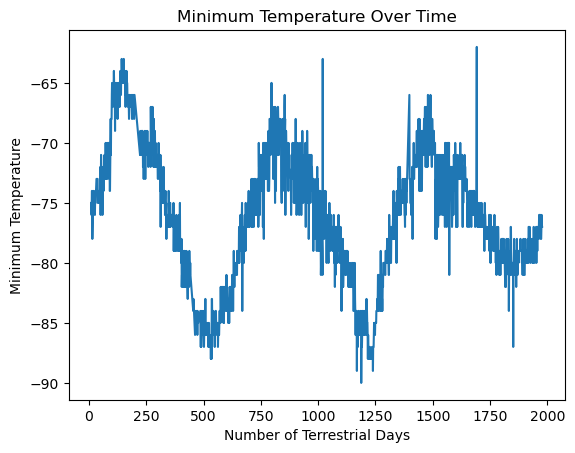

In [31]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.


# Plot the daily minimum temperature
plt.plot(df["sol"], df["min_temp"])

# Customize the plot
plt.title("Minimum Temperature Over Time")
plt.xlabel("Number of Terrestrial Days")
plt.ylabel("Minimum Temperature")

# Display the plot
plt.show()


There is approximately 687 Earth days in a Martian year according to ChatGPT.com

#### Minimum Temperature

Month 3 has the coldest month at -83.307292 celsius and month 8 has the warmest month at -68.382979 celsius.

#### Atmospheric Pressure

The top months with the highest average pressure are months 2 and 9, while the bottom lowest average pressure are months 6 and 5.

#### Year Length

From the plot, the distance between peaks is approximately 1490 to 800 Earth days, which suggests that a Martian year is about 690 Earth days. This estimate aligns closely with the established value of approximately 687 Earth days for a Martian year, as confirmed by online sources.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [33]:
# Write the data to a CSV
df.to_csv("mars_weather.csv", header=True, index=False, date_format="%Y-%m-%d")

In [34]:
browser.quit()